In [4]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import asyncio

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

# Now import from the scripts module
from scripts.data_ingestion import fetch_telegram_data
from scripts.preprocessing import preprocess_data
from scripts.labeling import convert_to_conll_format

In [5]:
# Load environment variables
load_dotenv()

# Define file paths
raw_folder = "../data/raw/"
processed_folder = "../data/processed/"
os.makedirs(processed_folder, exist_ok=True)

channels_file = os.path.join(raw_folder, "channels_to_crawl.csv")
telegram_data_file = os.path.join(processed_folder, "telegram_data.xlsx")
preprocessed_text_file = os.path.join(processed_folder, "preprocessed_text.txt")
conll_file = os.path.join(processed_folder, "labeled_conll.txt")
output_excel = os.path.join(processed_folder, "telegram_data.xlsx")


### Step 1: Fetch Telegram Data


In [7]:


api_id = os.getenv("TG_API_ID")
api_hash = os.getenv("TG_API_HASH")

with open(channels_file, "r") as f:
        channels = [line.strip() for line in f.readlines()]

print("Fetching Telegram data...")
asyncio.run(fetch_telegram_data(api_id, api_hash, channels, telegram_data_file))


c:\Users\hp\Desktop\Academic_Folders\Kifiya AI Mastery\week 5\EthioMart-Telegram-based-e-commerce\scripts\data_ingestion.py:16: RuntimeWarning: coroutine 'AuthMethods._start' was never awaited
  client.start()
2025-01-18 14:24:11,852 - INFO - Fetching messages from channel: @ZemenExpress
2025-01-18 14:24:11,853 - ERROR - Error fetching messages from @ZemenExpress: 'coroutine' object is not iterable
2025-01-18 14:24:11,853 - INFO - Fetching messages from channel: @sinayelj
c:\Users\hp\Desktop\Academic_Folders\Kifiya AI Mastery\week 5\EthioMart-Telegram-based-e-commerce\scripts\data_ingestion.py:22: RuntimeWarning: coroutine 'MessageMethods.get_messages' was never awaited
  messages = client.get_messages(
2025-01-18 14:24:11,853 - ERROR - Error fetching messages from @sinayelj: 'coroutine' object is not iterable
2025-01-18 14:24:11,859 - INFO - Fetching messages from channel: @modernshoppingcenter
2025-01-18 14:24:11,861 - ERROR - Error fetching messages from @modernshoppingcenter: 'coro

Fetching Telegram data...


C:\Users\hp\AppData\Local\Temp\ipykernel_20592\1579583797.py:8: RuntimeWarning: coroutine 'MessageMethods.get_messages' was never awaited
  asyncio.run(fetch_telegram_data(api_id, api_hash, channels, telegram_data_file))


RuntimeError: asyncio.run() cannot be called from a running event loop

2025-01-18 14:24:11,963 - INFO - Not disconnecting (already have no connection)



### Step 2: Preprocess Data

In [8]:

print("Preprocessing data...")
raw_text_file = os.path.join(raw_folder, "labeled_telegram_product_price_location.txt")
preprocess_data(raw_text_file, preprocessed_text_file)

2025-01-18 14:25:13,338 - INFO - Reading data from ../data/raw/labeled_telegram_product_price_location.txt


Preprocessing data...


2025-01-18 14:25:14,003 - INFO - Cleaned data saved to ../data/processed/preprocessed_text.txt


### Step 3: Convert to CoNLL Format

In [9]:
print("Converting to CoNLL format...")
convert_to_conll_format(preprocessed_text_file, conll_file)

Converting to CoNLL format...


'../data/processed/labeled_conll.txt'

### Step 4: Exploratory Data Analysis (EDA)

In [10]:
def eda_analysis(file_path):
    """Perform EDA on the dataset."""
    if file_path.endswith(".xlsx"):
        df = pd.read_excel(file_path)
    elif file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
    else:
        raise ValueError("Unsupported file format for EDA.")

    print("Data Overview:")
    print(df.head())
    print("\nData Summary:")
    print(df.describe())

    print("\nMissing Values:")
    print(df.isnull().sum())

    # Plot message length distribution
    if "message" in df.columns:
        df["message_length"] = df["message"].str.len()
        plt.figure(figsize=(10, 6))
        sns.histplot(df["message_length"], kde=True, bins=30, color="blue")
        plt.title("Message Length Distribution")
        plt.xlabel("Message Length")
        plt.ylabel("Frequency")
        plt.show()

    # Channel activity analysis
    if "channel" in df.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, y="channel", order=df["channel"].value_counts().index)
        plt.title("Message Count per Channel")
        plt.xlabel("Count")
        plt.ylabel("Channel")
        plt.show()


#### Plot message length distribution

Performing EDA on Telegram data...
Data Overview:
         channel                                            message  \
0  @ZemenExpress  💥👀 አልቋል ለተባላችሁ በድጋሜ ገብቷል💥💥\n\n📌 Only baby 3in1...   
1  @ZemenExpress                                                NaN   
2  @ZemenExpress                                                NaN   
3  @ZemenExpress  💥👀 አልቋል ለተባላችሁ በድጋሜ ገብቷል 💥💥\n\n📌 Only baby 3in...   
4  @ZemenExpress  💥💥...................................💥💥\n\n📌Ca...   

                 date         sender  
0 2025-01-18 08:21:09 -1001307493052  
1 2025-01-18 08:20:44 -1001307493052  
2 2025-01-18 08:20:44 -1001307493052  
3 2025-01-18 08:20:44 -1001307493052  
4 2025-01-18 08:12:54 -1001307493052  

Data Summary:
                             date        sender
count                         500  5.000000e+02
mean   2024-12-20 21:23:05.704000 -1.001405e+12
min           2024-08-18 05:58:51 -1.001650e+12
25%    2024-12-07 21:38:23.500000 -1.001425e+12
50%           2025-01-03 11:34:07 

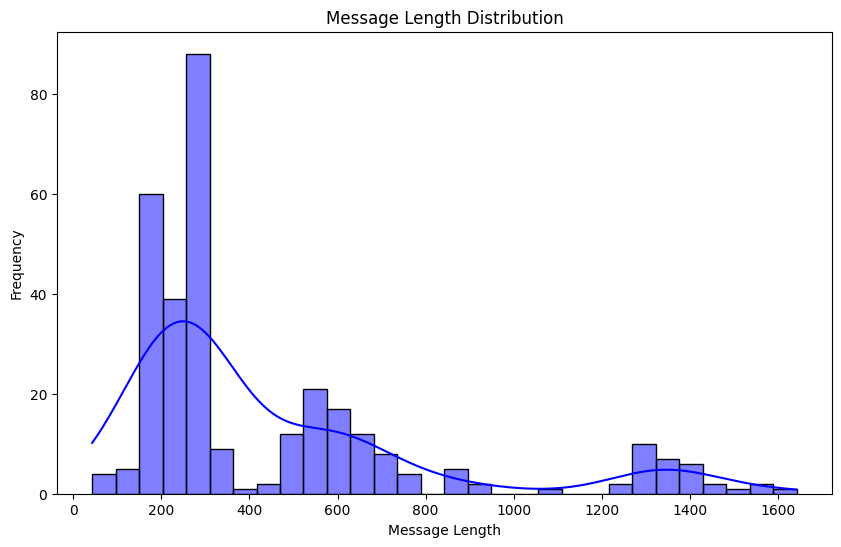

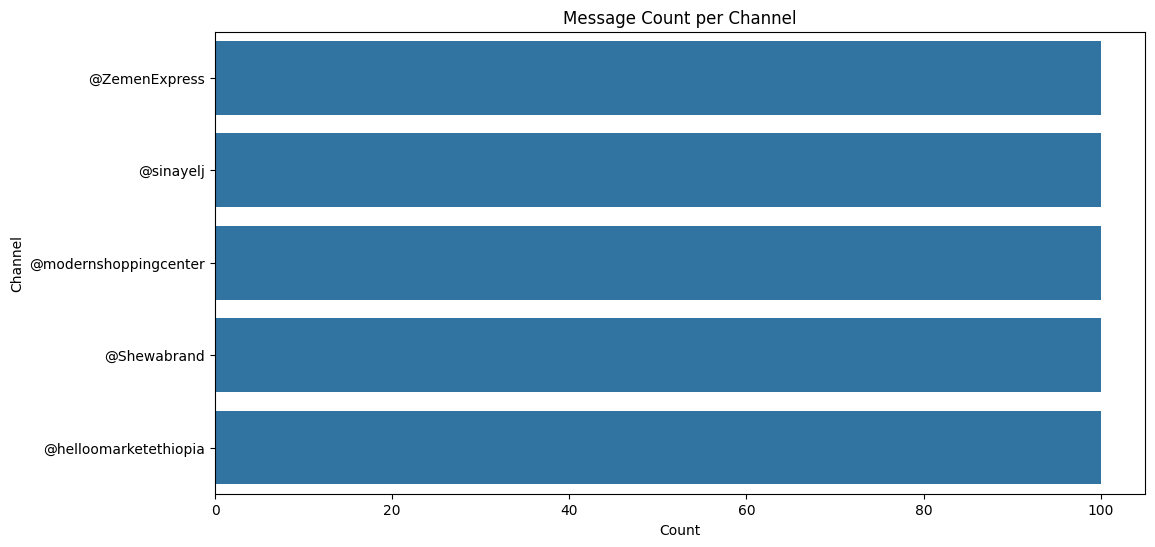

Pipeline completed. Outputs saved in: ../data/processed/


In [11]:
print("Performing EDA on Telegram data...")
eda_analysis(telegram_data_file)

print("Pipeline completed. Outputs saved in:", processed_folder)